# binary classifcation: bosch application

## 1. Import packages

In [1]:
## visualization setting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## import third party python data framework
import pandas as pd 
import numpy as np 

## ignore warning
import warnings
warnings.filterwarnings('ignore')

##import time
import time

## python CAS client library
from swat import *

### Connect to the server

In [2]:
## set portnumber and it will use multiple sessions in cross validation
portnumber = 14298
s= CAS('snap001.unx.sas.com', portnumber, 'lidong',nworkers=10)
s.setSessOpt(caslib='CASUSER', locale='en_US')

NOTE: 'CASUSER(lidong)' is now the active caslib.


+ Elapsed: 0.0139s, user: 0.018s, sys: 0.027s, mem: 0.857mb

## 3. Load the action sets

In [3]:
s.loadactionset('simple')         ## extract features  
s.loadactionset('dataStep')       ## create 5-fold cross-validation data sets for tuning paramters
s.loadactionset('fedsql')         ## sql operation on CAS Table
s.loadactionset('decisionTree')   ## train tree model

NOTE: Added action set 'simple'.
NOTE: Added action set 'dataStep'.
NOTE: Added action set 'fedsql'.
NOTE: Added action set 'decisionTree'.


[actionset]

 'decisionTree'

+ Elapsed: 0.116s, user: 0.017s, sys: 0.039s, mem: 0.334mb

## 4. Load data from HDFS into CAS

In [4]:
traincsv = s.CASTable('trainid', replace = True)
s.upload('../bosch/trainid.csv', casout = traincsv)

NOTE: Cloud Analytic Services made the uploaded file available as table TRAINID in caslib CASUSER(lidong).
NOTE: The table TRAINID has been created in caslib CASUSER(lidong) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSER(lidong)'

[tableName]

 'TRAINID'

[casTable]

 CASTable('TRAINID', caslib='CASUSER(lidong)')

+ Elapsed: 0.61s, user: 0.209s, sys: 0.213s, mem: 256mb

In [5]:
testcsv = s.CASTable('testid', replace=True)
s.upload('../bosch/testid.csv',casout=testcsv)

NOTE: Cloud Analytic Services made the uploaded file available as table TESTID in caslib CASUSER(lidong).
NOTE: The table TESTID has been created in caslib CASUSER(lidong) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSER(lidong)'

[tableName]

 'TESTID'

[casTable]

 CASTable('TESTID', caslib='CASUSER(lidong)')

+ Elapsed: 0.305s, user: 0.127s, sys: 0.186s, mem: 251mb

In [6]:
valcsv = s.CASTable('valid', replace=True)
s.upload('../bosch/valid.csv',casout = valcsv)

NOTE: Cloud Analytic Services made the uploaded file available as table VALID in caslib CASUSER(lidong).
NOTE: The table VALID has been created in caslib CASUSER(lidong) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSER(lidong)'

[tableName]

 'VALID'

[casTable]

 CASTable('VALID', caslib='CASUSER(lidong)')

+ Elapsed: 0.409s, user: 0.146s, sys: 0.17s, mem: 251mb

### Train numeric features

In [7]:
## train=pd.read_csv("C:/NLB/NLB_train_tab_h.txt",sep='\t',decimal=',')
## s.upload(data=train,casout=table('df_trainTable',replace=True))
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'trainnumeric'},
                  caslib='HPS',
                  path='train_numeric_bosch.sashdat')


NOTE: Cloud Analytic Services made the HDFS file train_numeric_bosch.sashdat available as table TRAINNUMERIC in caslib CASUSER(lidong).


[caslib]

 'CASUSER(lidong)'

[tableName]

 'TRAINNUMERIC'

[casTable]

 CASTable('TRAINNUMERIC', caslib='CASUSER(lidong)')

+ Elapsed: 18.4s, user: 0.185s, sys: 13.5s, mem: 8.95mb

In [8]:
trainnumeric = s.CASTable('trainnumeric')
trainnumeric.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT
0,Id,4.000,2367495.000,1183747.0,0.0,1.184050e+06,1.401615e+12,683434.767725,6.281562e+02,4.670831e+11,2.212490e+18,5.529077e+17,5.772011e+01,1884.960808,0.000000e+00
1,L0_S0_F0,-0.565,0.278,673862.0,509885.0,5.456013e-05,3.676600e+01,0.080214,9.771629e-05,6.434354e-03,4.335862e+03,4.335860e+03,1.470202e+05,0.558352,5.766039e-01
2,L0_S0_F2,-0.616,0.302,673862.0,509885.0,9.128575e-05,6.151400e+01,0.092799,1.130466e-04,8.611642e-03,5.803055e+03,5.803049e+03,1.016576e+05,0.807506,4.193756e-01
3,L0_S0_F4,-0.415,0.585,673862.0,509885.0,4.005271e-05,2.699000e+01,0.211520,2.576708e-04,4.474055e-02,3.014892e+04,3.014891e+04,5.281031e+05,0.155441,8.764734e-01
4,L0_S0_F6,-0.416,0.584,673862.0,509885.0,1.383518e-05,9.323000e+00,0.211635,2.578115e-04,4.478942e-02,3.018184e+04,3.018184e+04,1.529689e+06,0.053664,9.572029e-01
5,L0_S0_F8,-0.447,0.466,673862.0,509885.0,-1.256667e-04,-8.468200e+01,0.094555,1.151860e-04,8.940675e-03,6.024783e+03,6.024772e+03,-7.524281e+04,-1.090989,2.752780e-01
6,L0_S0_F10,-0.612,0.388,673862.0,509885.0,1.613283e-04,1.087130e+02,0.164469,2.003540e-04,2.704998e-02,1.822794e+04,1.822792e+04,1.019466e+05,0.805216,4.206952e-01
7,L0_S0_F12,-0.052,0.948,673862.0,509885.0,-4.411734e-05,-2.972900e+01,0.019451,2.369479e-05,3.783352e-04,2.549466e+02,2.549453e+02,-4.408888e+04,-1.861900,6.261756e-02
8,L0_S0_F14,-0.272,0.688,673862.0,509885.0,-3.591596e-04,-2.420240e+02,0.104133,1.268541e-04,1.084376e-02,7.307274e+03,7.307187e+03,-2.899362e+04,-2.831281,4.636332e-03
9,L0_S0_F16,-0.500,0.500,673862.0,509885.0,6.722445e-07,4.530000e-01,0.114829,1.398836e-04,1.318574e-02,8.885353e+03,8.885353e+03,1.708146e+07,0.004806,9.961656e-01


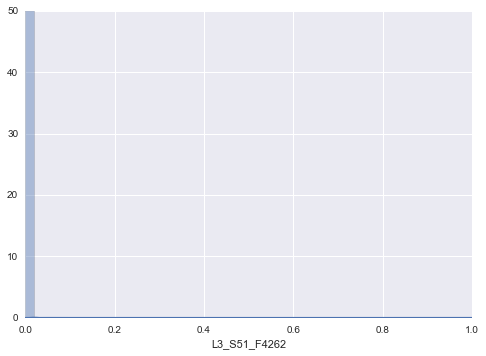

In [9]:
import pandas as pd
x = trainnumeric['L3_S51_F4262'].to_series()
sns.distplot(x.dropna())

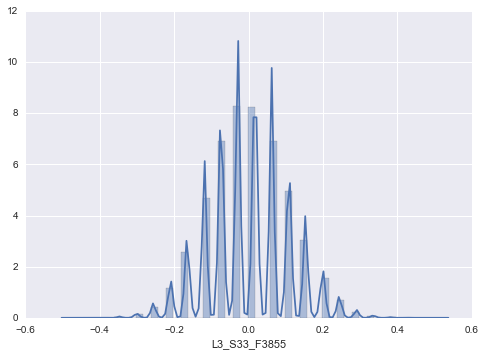

In [10]:
x = trainnumeric['L3_S33_F3855'].to_series()
sns.distplot(x.dropna())

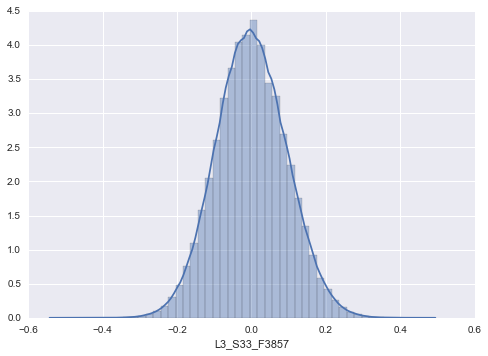

In [11]:
x = trainnumeric['L3_S33_F3857'].to_series()
sns.distplot(x.dropna())

## Merge Test table

In [12]:
## s.upload(data=train,casout=table('df_trainTable',replace=True))
train_test = s.CASTable('train_test', replace = True)
s.table.loadtable(casout = train_test,
                  caslib = 'HPS',
                  path = 'trainTestIdInfor.sashdat')

NOTE: Cloud Analytic Services made the HDFS file trainTestIdInfor.sashdat available as table TRAIN_TEST in caslib CASUSER(lidong).


[caslib]

 'CASUSER(lidong)'

[tableName]

 'TRAIN_TEST'

[casTable]

 CASTable('TRAIN_TEST', caslib='CASUSER(lidong)')

+ Elapsed: 5.19s, user: 0.095s, sys: 0.333s, mem: 1.87mb

## Merge train Table with train-test data

In [13]:
trainnumeric = s.CASTable('trainnumeric')
trainnumeric.shape

(1183747, 970)

(1183747, 970)

(1183748, 969)

In [14]:
##SQL merge two CAS tables: trainCASTable and despCASTable
querystr = 'select t1.*, t2.* from trainnumeric as t1 left join \
            train_test as t2 on t1.Id = t2.Id'

boschTrain = s.CASTable('boschTrain',replace=True)

s.execDirect(casOut=boschTrain, query=querystr)

NOTE: Column Id already exists. Column Id_2 has been created in table boschTrain instead.
NOTE: Column Response already exists. Column Response_2 has been created in table boschTrain instead.
NOTE: Table boschTrain was created in caslib CASUSER(lidong) with 1183747 rows returned.


+ Elapsed: 14.5s, user: 271s, sys: 89.6s, mem: 7.85e+03mb

In [15]:
boschTrain.shape

(1183747, 978)

In [16]:
s.runCode("data boschTrain;\
           set boschTrain;\
           drop Id_2;\
           drop Response_2;\
           run;")

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrain,1183747,978,"CASTable('boschTrain', caslib='CASUSER(lidong)')"
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrain,1183747,976,"CASTable('boschTrain', caslib='CASUSER(lidong)')"


### Train

In [17]:
querystr = 'select t1.*, t2.* from trainid as t1 left join \
            boschTrain as t2 on t1.Id = t2.Id'

TrainBosch = s.CASTable('Train',replace=True)

s.execDirect(casOut=TrainBosch, query=querystr)

NOTE: Column Id already exists. Column Id_2 has been created in table Train instead.
NOTE: Table Train was created in caslib CASUSER(lidong) with 591084 rows returned.


+ Elapsed: 11.4s, user: 161s, sys: 91.9s, mem: 4.48e+03mb

### Test

In [18]:
##SQL merge two CAS tables: trainCASTable and despCASTable
querystr = 'select t1.*, t2.* from testid as t1 left join \
            boschTrain as t2 on t1.Id = t2.Id'

TestBosch = s.CASTable('Test',replace=True)

s.execDirect(casOut=TestBosch, query=querystr)

NOTE: Column Id already exists. Column Id_2 has been created in table Test instead.
NOTE: Table Test was created in caslib CASUSER(lidong) with 295720 rows returned.


+ Elapsed: 13.6s, user: 132s, sys: 75.8s, mem: 3.96e+03mb

### Valid

In [19]:
##SQL merge two CAS tables: trainCASTable and despCASTable
querystr = 'select t1.*, t2.* from valid as t1 left join \
            boschTrain as t2 on t1.Id = t2.Id'

ValidBosch = s.CASTable('Validate',replace=True)

s.execDirect(casOut=ValidBosch, query=querystr)

NOTE: Column Id already exists. Column Id_2 has been created in table Validate instead.
NOTE: Table Validate was created in caslib CASUSER(lidong) with 296943 rows returned.


+ Elapsed: 11.1s, user: 134s, sys: 75.5s, mem: 3.95e+03mb

### Prepare features for table

In [20]:
allVars = TrainBosch.columns.values
allVars

array(['Id', 'Id_2', 'L0_S0_F0', 'L0_S0_F2', 'L0_S0_F4', 'L0_S0_F6',
       'L0_S0_F8', 'L0_S0_F10', 'L0_S0_F12', 'L0_S0_F14', 'L0_S0_F16',
       'L0_S0_F18', 'L0_S0_F20', 'L0_S0_F22', 'L0_S1_F24', 'L0_S1_F28',
       'L0_S2_F32', 'L0_S2_F36', 'L0_S2_F40', 'L0_S2_F44', 'L0_S2_F48',
       'L0_S2_F52', 'L0_S2_F56', 'L0_S2_F60', 'L0_S2_F64', 'L0_S3_F68',
       'L0_S3_F72', 'L0_S3_F76', 'L0_S3_F80', 'L0_S3_F84', 'L0_S3_F88',
       'L0_S3_F92', 'L0_S3_F96', 'L0_S3_F100', 'L0_S4_F104', 'L0_S4_F109',
       'L0_S5_F114', 'L0_S5_F116', 'L0_S6_F118', 'L0_S6_F122',
       'L0_S6_F132', 'L0_S7_F136', 'L0_S7_F138', 'L0_S7_F142',
       'L0_S8_F144', 'L0_S8_F146', 'L0_S8_F149', 'L0_S9_F155',
       'L0_S9_F160', 'L0_S9_F165', 'L0_S9_F170', 'L0_S9_F175',
       'L0_S9_F180', 'L0_S9_F185', 'L0_S9_F190', 'L0_S9_F195',
       'L0_S9_F200', 'L0_S9_F205', 'L0_S9_F210', 'L0_S10_F219',
       'L0_S10_F224', 'L0_S10_F229', 'L0_S10_F234', 'L0_S10_F239',
       'L0_S10_F244', 'L0_S10_F249', 'L0_S10_F254',

In [21]:
removeVars = ['Id', 'Response']
inputVarsc = [x for x in allVars if x not in removeVars]

In [22]:
import time
start=time.time()
trainResult=s.gbtreetrain(    table    = TrainBosch,
                              inputs   = inputVarsc,
                              quantileBin=1,
                              target   = 'Response',
                              maxlevel = 10,
                              leafsize = 20,
                              ntree    = 200,
                              learningRate = 0.05,
                              m        = 100,
                              samplingRate = 0.6,
                              lasso    = 0,
                              ridge    = 0,
                              varimp   = 1,
                              seed     = 2016,
                              casout   = {'name': "currentmodelgbt", 'replace':1})

endt=time.time()
print((endt-start)/60) 

4.612519852320353


In [33]:
trainResult

,Descr,Value
0,Number of Trees,200.00
1,Distribution,1.00
2,Learning Rate,0.05
3,Subsampling Rate,0.60
4,Number of Selected Variables (M),100.00
5,Number of Bins,20.00
6,Number of Variables,975.00
7,Max Number of Tree Nodes,545.00
8,Min Number of Tree Nodes,159.00
9,Max Number of Branches,2.00


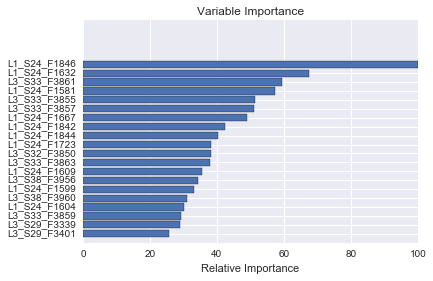

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

ImpVariableData = trainResult.DTreeVarImpInfo.head(20)
# Plot feature importance
feature_importance = ImpVariableData['Importance']
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 1
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, ImpVariableData['Variable'][sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [52]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [53]:
def visualizeImportance(N=10):
    
    ImpVariableData = trainResult.DTreeVarImpInfo.head(N)
    # Plot feature importance
    feature_importance = ImpVariableData['Importance']
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 1
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, ImpVariableData['Variable'][sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
   

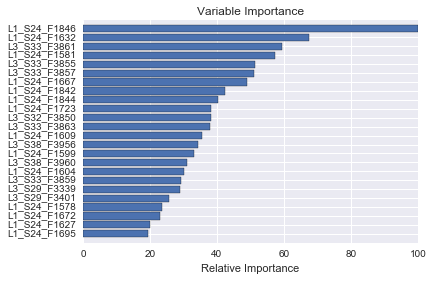

In [54]:
w = interactive(visualizeImportance, N=(0,50))
display(w)

In [23]:
s.fetch('currentmodelgbt', to=3)

,_Target_,_NumTargetLevel_,_NodeID_,_TreeLevel_,_NodeName_,_Parent_,_ParentName_,_NodeType_,_Gain_,_NumObs_,_NumDistObs_,_TargetMean_,_NumChild_,_ChildID0_,_ChildID1_,_PBranches_,_PBLower0_,_PBUpper0_,_TreeID_
0,Response,1.0,0.0,0.0,L1_S24_F1581,-1.0,,2.0,4.739164,354646.0,0.0,0.0,2.0,1.0,2.0,0.0,NaN,NaN,0.0
1,Response,1.0,10.0,3.0,L3_S29_F3357,5.0,StartTime,2.0,0.402976,184880.0,0.0,0.0,2.0,15.0,16.0,1.0,0.000,944.100,0.0
2,Response,1.0,20.0,4.0,L2_S27_F3133,12.0,L1_S24_F1391,2.0,0.117770,19751.0,0.0,0.0,2.0,35.0,36.0,1.0,-0.163,-0.065,0.0


## Test

In [24]:
import time
start=time.time()
res=s.gbtreescore(table = TestBosch,
                    model ='currentmodelgbt',
                    copyVars={"Id","Response"},    
                    encodeName=True,
                    casout={'name':'resultPredicttest','replace':1}
                 ) 

              
endt=time.time()
print((endt-start)/60)

0.3908224185307821


In [25]:
s.fetch('resultPredicttest')

,Id,Response,P_Response,_Residual_
0,2188157.0,0.0,0.015555,0.015555
1,2188392.0,0.0,0.054089,0.054089
2,2189054.0,0.0,0.015267,0.015267
3,2189577.0,0.0,0.199264,0.199264
4,2190302.0,0.0,0.074582,0.074582
5,2190796.0,0.0,-0.005201,-0.005201
6,2191176.0,0.0,-0.009910,-0.009910
7,2191285.0,0.0,0.071219,0.071219
8,2194533.0,0.0,0.068962,0.068962
9,2195252.0,0.0,0.044398,0.044398


In [26]:
out =s.assess(
    table(
        name='resultPredicttest'
    ),                                                   # input #
   
    inputs="P_Response", 
    response = 'Response',
    cutstep =0.0001,
    casOut=table("casoutt",replace=True),
    rocout = table('rosout',replace=True),
    event='1'
)

In [27]:
rosout = s.CASTable('rosout')
rosdataframe = rosout.head(10000)
rosdataframe.head(5)

,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,_KS2_,_FHALF_,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_
0,P_Response,1,0.0000,1669.0,281860.0,45.0,12146.0,0.973746,0.041312,0.0,0.015058,0.007347,0.958688,0.046716,0.994113,0.011702,0.610635,0.22127,0.221424,0.002381
1,P_Response,1,0.0001,1669.0,281798.0,45.0,12208.0,0.973746,0.041523,0.0,0.015269,0.007349,0.958477,0.046926,0.994112,0.011705,0.610635,0.22127,0.221424,0.002381
2,P_Response,1,0.0002,1668.0,281708.0,46.0,12298.0,0.973162,0.041829,0.0,0.014991,0.007347,0.958171,0.047227,0.994114,0.011702,0.610635,0.22127,0.221424,0.002381
3,P_Response,1,0.0003,1667.0,281605.0,47.0,12401.0,0.972579,0.042179,0.0,0.014758,0.007345,0.957821,0.047572,0.994115,0.011699,0.610635,0.22127,0.221424,0.002381
4,P_Response,1,0.0004,1667.0,281513.0,47.0,12493.0,0.972579,0.042492,0.0,0.015071,0.007347,0.957508,0.047883,0.994113,0.011703,0.610635,0.22127,0.221424,0.002381


In [28]:
rosdataframe.to_csv('qviyatest.csv', index=False)

### Validate

In [29]:
import time
start=time.time()
res=s.gbtreescore(table = TestBosch,
                    model ='currentmodelgbt',
                    copyVars={"Id","Response"},    
                    encodeName=True,
                    casout={'name':'resultPredictvalid','replace':1}
                 ) 

              
endt=time.time()
print((endt-start)/60)

0.35934364795684814


In [30]:
out =s.assess(
    table(
        name='resultPredictvalid'
    ),                                                   # input #
   
    inputs="P_Response", 
    response = 'Response',
    cutstep =0.0001,
    casOut=table("casoutt",replace=True),
    rocout = table('rosout',replace=True),
    event='1'
)

In [31]:
rosout = s.CASTable('rosout')
rosdataframe = rosout.head(10000)
rosdataframe.head(5)

,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,_KS2_,_FHALF_,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_
0,P_Response,1,0.0000,1669.0,281860.0,45.0,12146.0,0.973746,0.041312,0.0,0.015058,0.007347,0.958688,0.046716,0.994113,0.011702,0.610635,0.22127,0.221424,0.002381
1,P_Response,1,0.0001,1669.0,281798.0,45.0,12208.0,0.973746,0.041523,0.0,0.015269,0.007349,0.958477,0.046926,0.994112,0.011705,0.610635,0.22127,0.221424,0.002381
2,P_Response,1,0.0002,1668.0,281708.0,46.0,12298.0,0.973162,0.041829,0.0,0.014991,0.007347,0.958171,0.047227,0.994114,0.011702,0.610635,0.22127,0.221424,0.002381
3,P_Response,1,0.0003,1667.0,281605.0,47.0,12401.0,0.972579,0.042179,0.0,0.014758,0.007345,0.957821,0.047572,0.994115,0.011699,0.610635,0.22127,0.221424,0.002381
4,P_Response,1,0.0004,1667.0,281513.0,47.0,12493.0,0.972579,0.042492,0.0,0.015071,0.007347,0.957508,0.047883,0.994113,0.011703,0.610635,0.22127,0.221424,0.002381


In [32]:
rosdataframe.to_csv('qviyavalid.csv', index=False)